In [372]:
import numpy as numpy
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [373]:
df = pd.read_csv('./레이블부여된공지사항(수정본).csv')
df.head()

,Cid,title,hits,time,cluster
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,116,2023-05-26,43
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,99,2023-05-26,25
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,180,2023-05-25,285
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,174,2023-05-25,354
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),125,2023-05-25,140


In [374]:
# year, month column 추가
df['year'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df['month'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

df.head()

,Cid,title,hits,time,cluster,year,month
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,116,2023-05-26,43,2023,5
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,99,2023-05-26,25,2023,5
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,180,2023-05-25,285,2023,5
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,174,2023-05-25,354,2023,5
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),125,2023-05-25,140,2023,5


In [375]:
#df_Cid_1~10 생성
for i in range(1,11):
    globals()['df_Cid_{}'.format(i)] = df[df['Cid']==i]

df_Cid_1.head()


,Cid,title,hits,time,cluster,year,month
0,1,(예비군연대) 2023년 6월 각 군 현역병 모집계획 안내,116,2023-05-26,43,2023,5
1,1,2023 세계스카우트잼버리 영외과정활동 「사찰문화체험」 통역 자원봉사자 모집,99,2023-05-26,25,2023,5
2,1,「대학생 테마별 톡톡 멘토링」 참여 동아리 추가모집,180,2023-05-25,285,2023,5
3,1,「2023년 국가간 청소년교류」 및 「글로벌 청소년 서밋」청소년 참가자 모집,174,2023-05-25,354,2023,5
4,1,2023-1 실험실습 교과목 만족도 조사 안내 (드림패스 마일리지 지급),125,2023-05-25,140,2023,5


In [376]:
#df_Cid_1~10_2019~2022 생성
for i in range(1,11):
    globals()['df_Cid_{}_2019'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2019]
    globals()['df_Cid_{}_2020'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2020]
    globals()['df_Cid_{}_2021'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2021]
    globals()['df_Cid_{}_2022'.format(i)] = globals()['df_Cid_{}'.format(i)][globals()['df_Cid_{}'.format(i)]['year']==2022]



In [404]:
def plot_monthly_hits(df, cid):
    df_monthly = df.groupby(['month', 'cluster'])['hits'].sum().reset_index()
    df_top_clusters = df_monthly.groupby('month').apply(lambda x: x.nlargest(3, 'hits')).reset_index(drop=True)

    clusters = df_top_clusters['cluster'].unique()
    num_clusters = len(clusters)
    colors = plt.cm.tab20(np.linspace(0, 1, num_clusters))

    monthly_data = []
    for month in range(1, 13):
        df_month = df_top_clusters[df_top_clusters['month'] == month]
        monthly_hits = {cluster: 0 for cluster in clusters}
        for cluster in clusters:
            if cluster in df_month['cluster'].values:
                monthly_hits[cluster] = df_month.loc[df_month['cluster'] == cluster, 'hits'].values[0]
        monthly_data.append(monthly_hits)

    fig, ax = plt.subplots(figsize=(12, 8))
    df_monthly_top_clusters = pd.DataFrame(monthly_data, index=range(1, 13))
    df_monthly_top_clusters.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_xlabel('Month')
    ax.set_ylabel('Hits')
    ax.set_title(f'Monthly Hits of Top 3 Clusters for Cid={cid}')
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.tight_layout()
    plt.show()


In [378]:
import matplotlib.pyplot as plt

def plot_monthly_top_clusters(df, cid, nor=1, num_clusters=3, figsize=(15, 20)):
    # Filter dataframe by cid
    df_cid = df[df['Cid'] == cid]

    # Create subplots
    fig, axs = plt.subplots(4, 3, figsize=figsize)  # 4 rows of 3 plots each

    plt.suptitle(f'Cid_{cid} Monthly Top {num_clusters} Clusters Hits', fontsize=16, y=1.02)

    # Month labels
    months = [
        "January", "February", "March",
        "April", "May", "June",
        "July", "August", "September",
        "October", "November", "December"
    ]

    # Calculate the maximum y value across all subplots
    max_y_value = df_cid.groupby(['cluster'])['hits'].sum().nlargest(num_clusters).max() / nor

    # Loop over each subplot and populate with data for that month
    for i, ax in enumerate(axs.flatten()):
        # Create monthly dataframe
        df_monthly = df_cid[df_cid['month'] == i + 1]
        df_monthly_top_clusters = df_monthly.groupby('cluster')['hits'].sum().nlargest(num_clusters)

        # Create the bar chart
        if df_monthly_top_clusters.empty:
            df_monthly_top_clusters = pd.Series([0] * num_clusters, index=range(1, num_clusters + 1))

        df_monthly_top_clusters.plot(kind='bar', ax=ax)

        # Set title and labels
        ax.set_title(months[i])
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Hits')

        # Set the same y axis limit for all subplots
        ax.set_ylim(0, max_y_value)

        # Rotate x labels
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

        # Write cluster numbers on top of the bars
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()


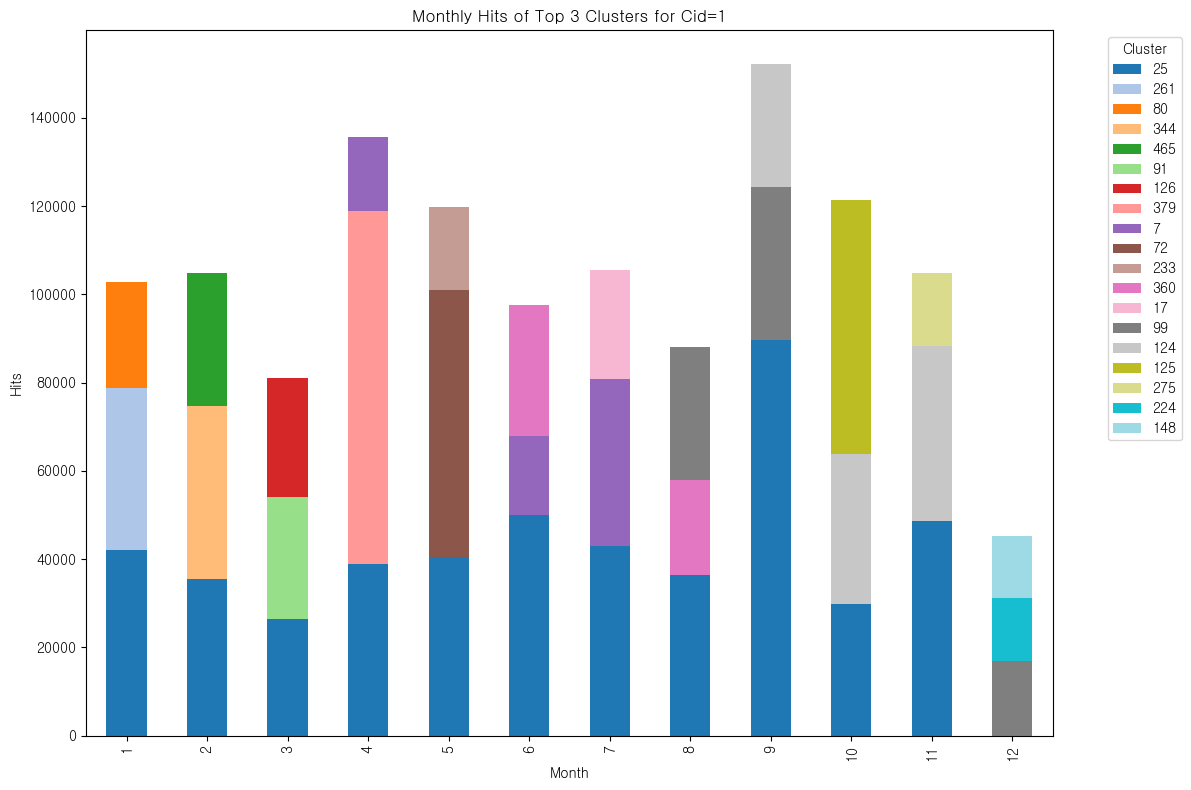

In [405]:
plot_monthly_hits(df_Cid_1, 1)


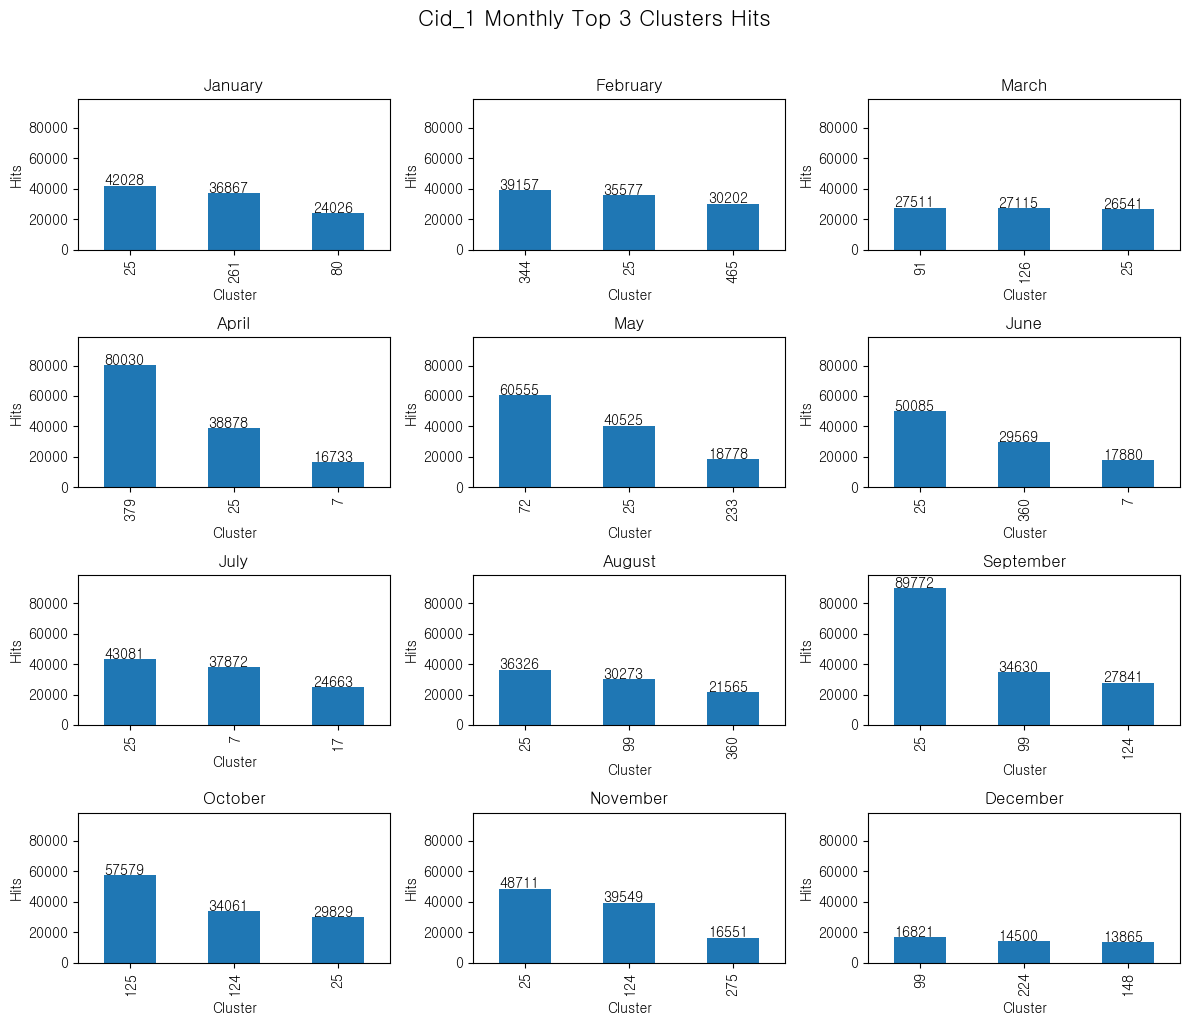

In [380]:
plot_monthly_top_clusters(df, cid=1, nor=5,num_clusters=3, figsize=(12, 10))


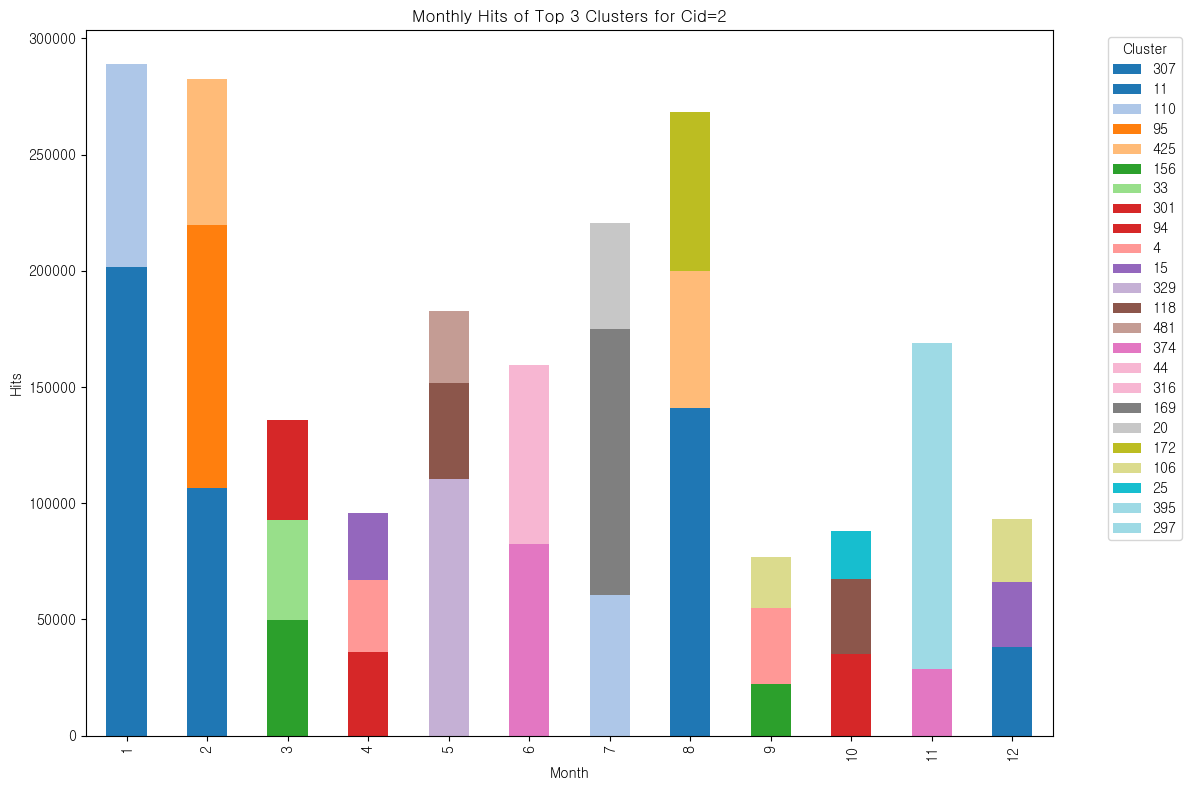

In [406]:
plot_monthly_hits(df_Cid_2, 2)


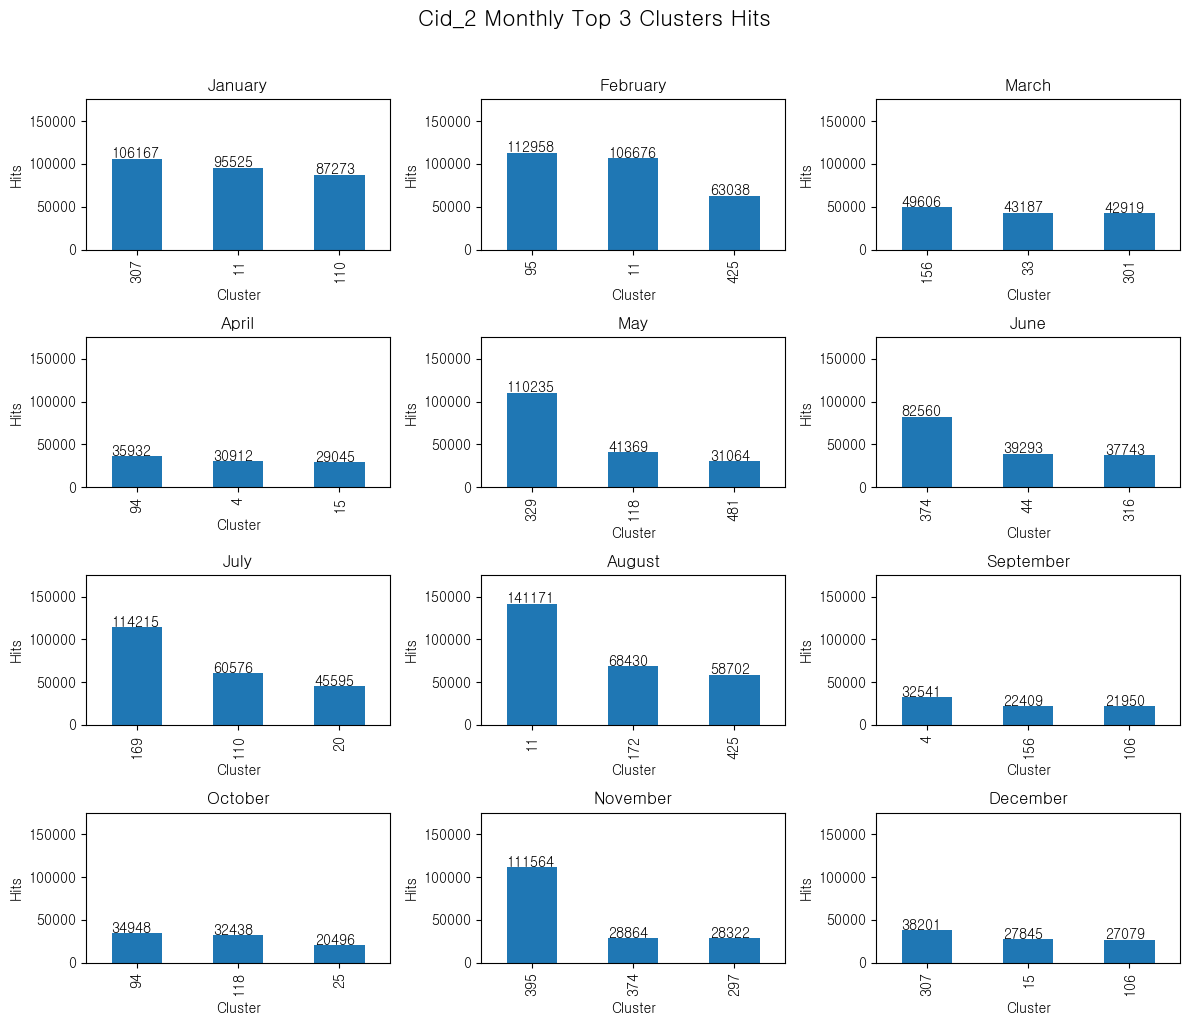

In [381]:
plot_monthly_top_clusters(df, cid=2, nor=2,num_clusters=3, figsize=(12, 10))

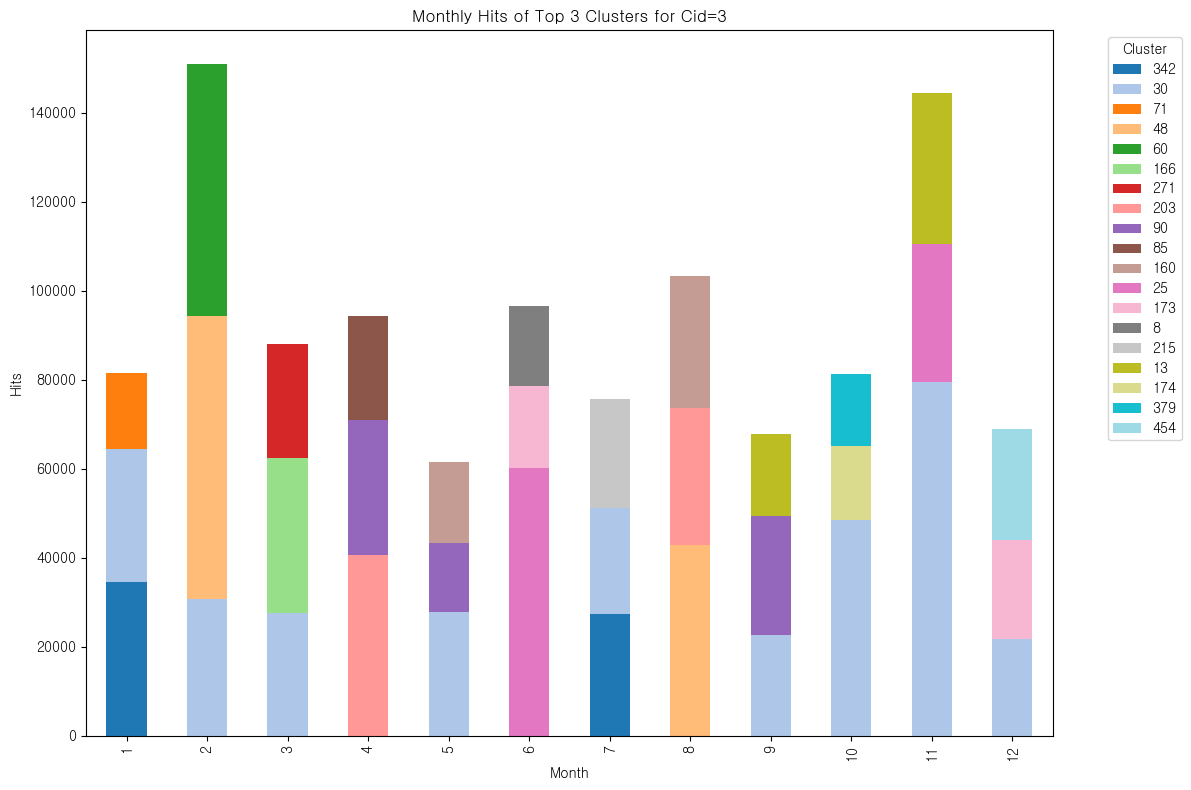

In [407]:
plot_monthly_hits(df_Cid_3, 3)


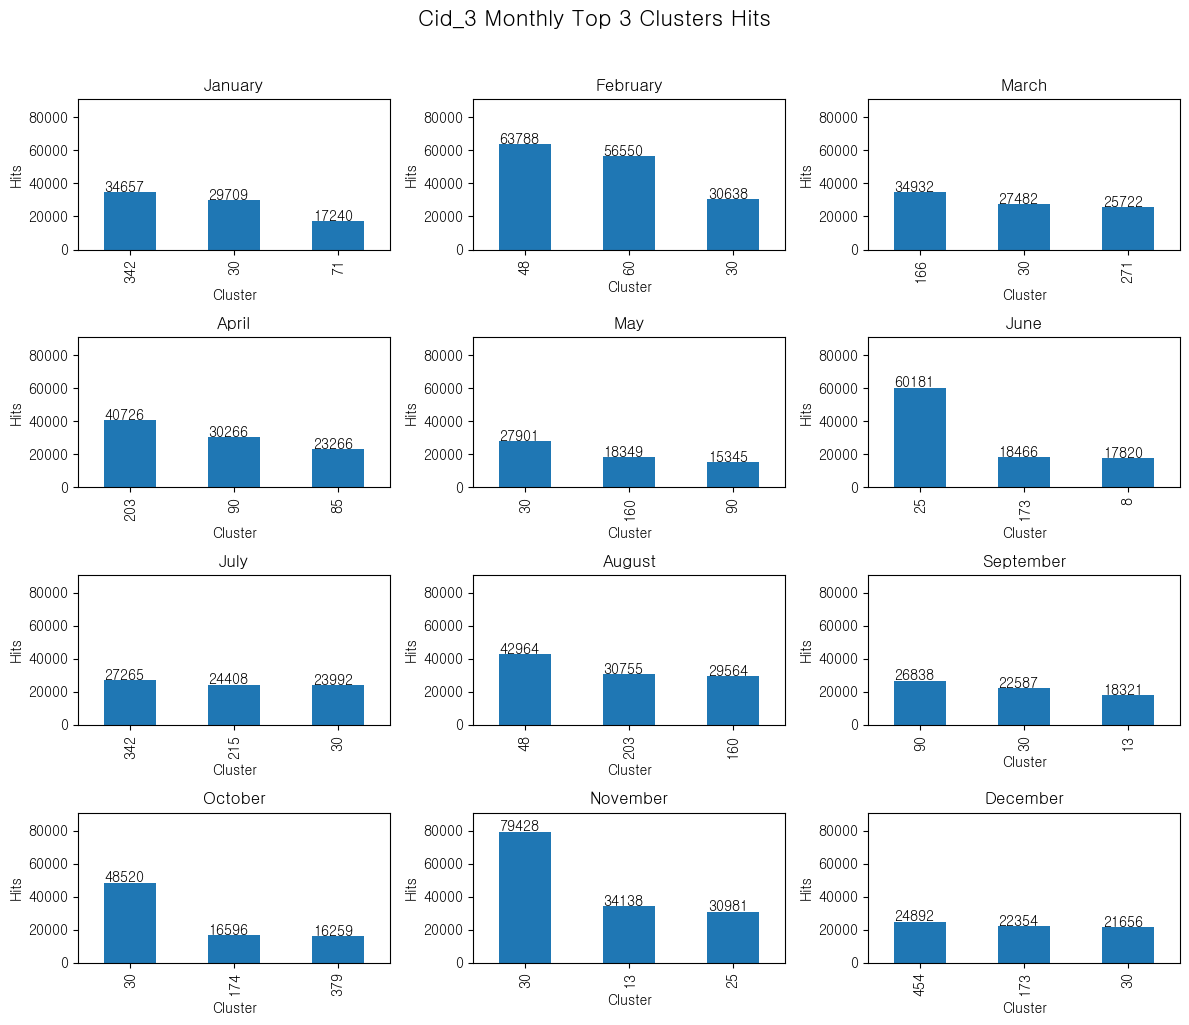

In [382]:
plot_monthly_top_clusters(df, cid=3, nor=4,num_clusters=3, figsize=(12, 10))


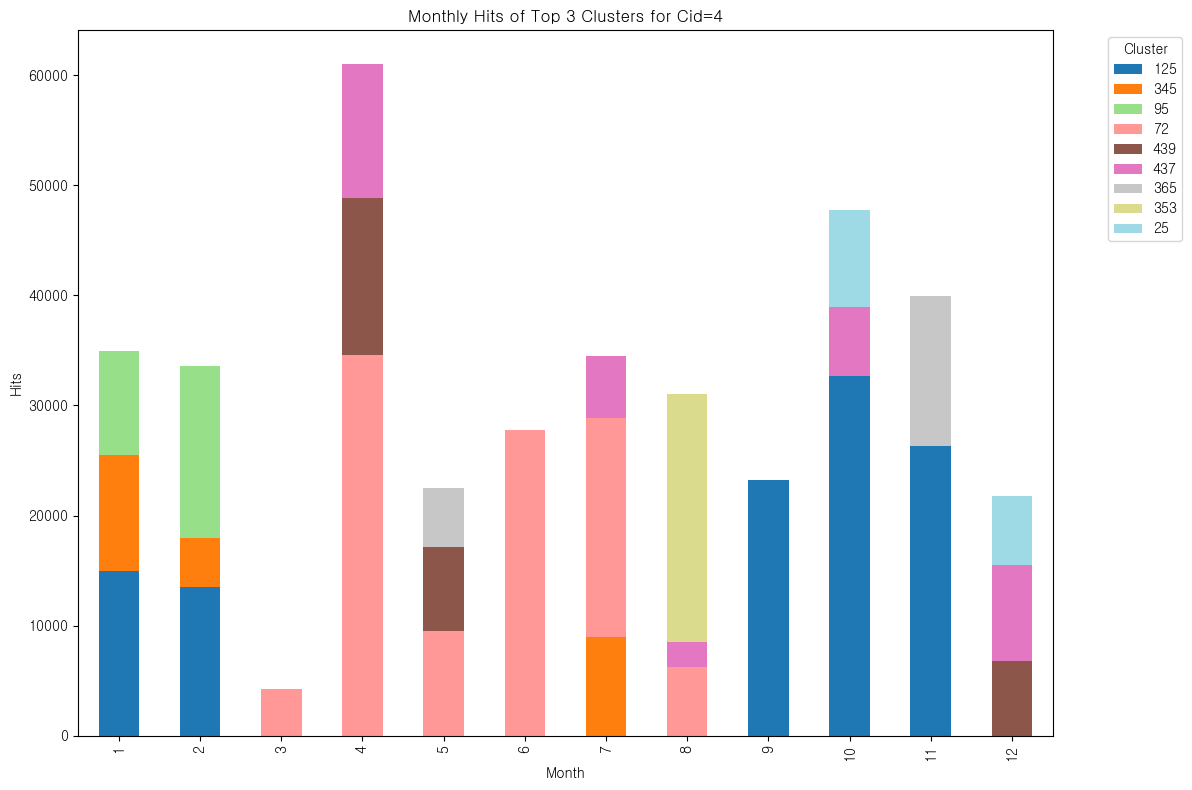

In [408]:
plot_monthly_hits(df_Cid_4, 4)


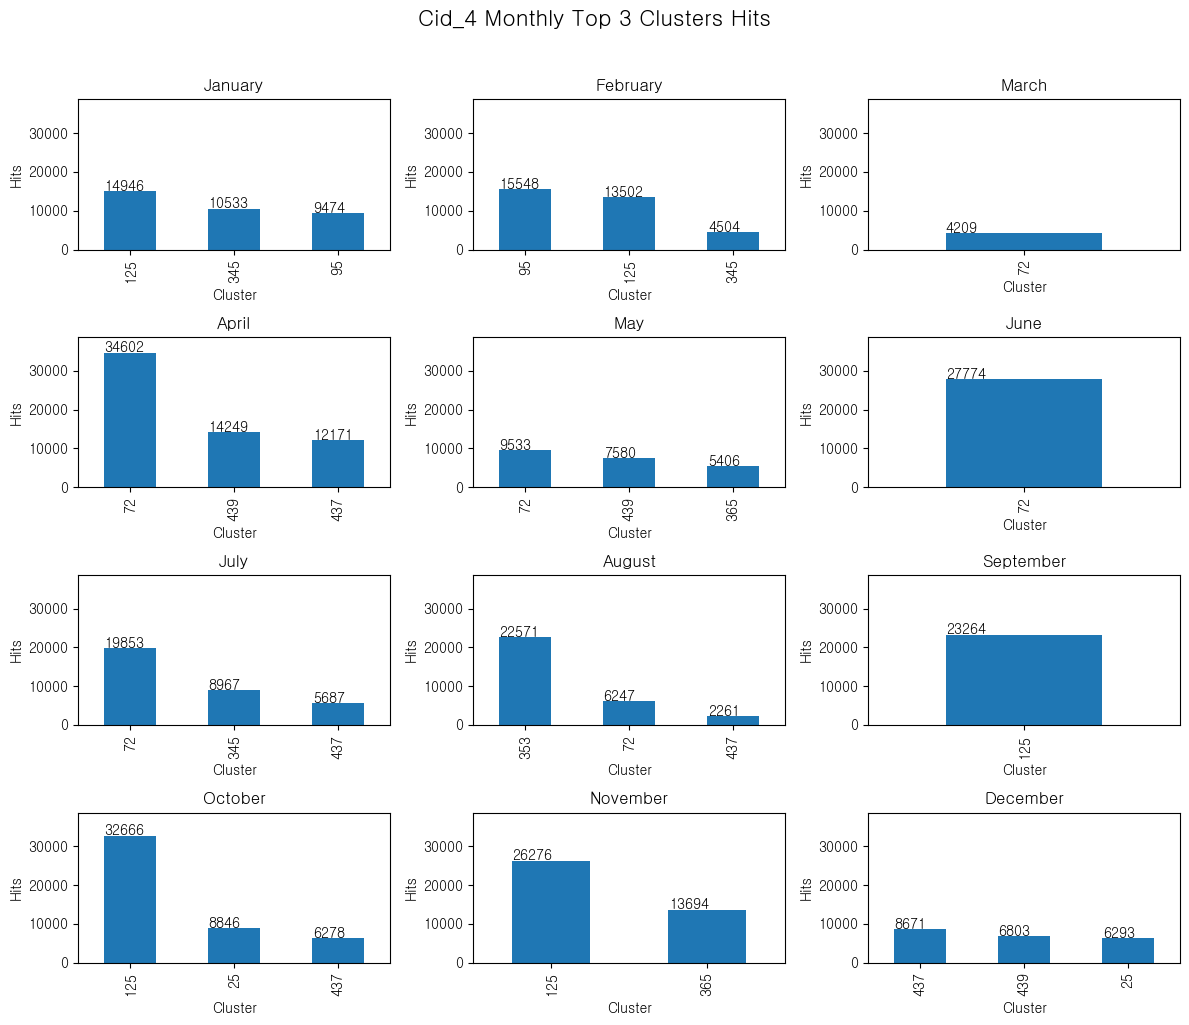

In [383]:
plot_monthly_top_clusters(df, cid=4, nor=3,num_clusters=3, figsize=(12, 10))


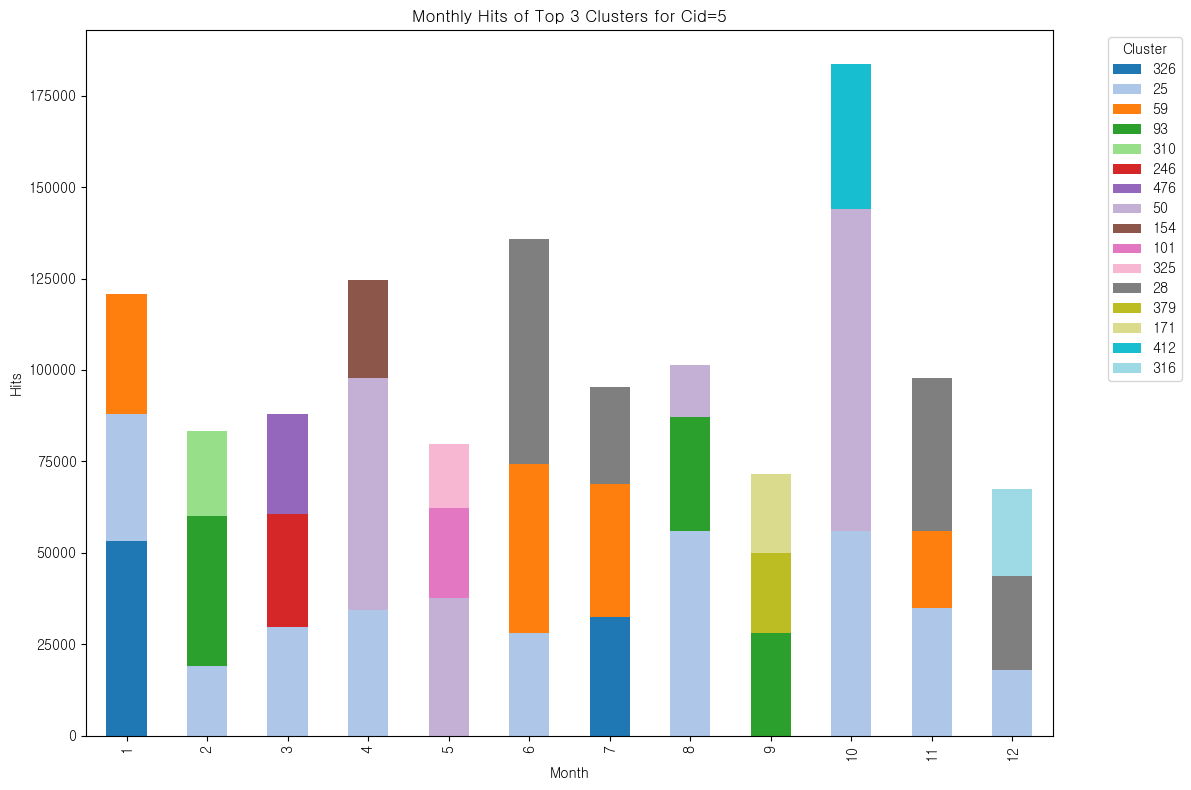

In [409]:
plot_monthly_hits(df_Cid_5, 5)


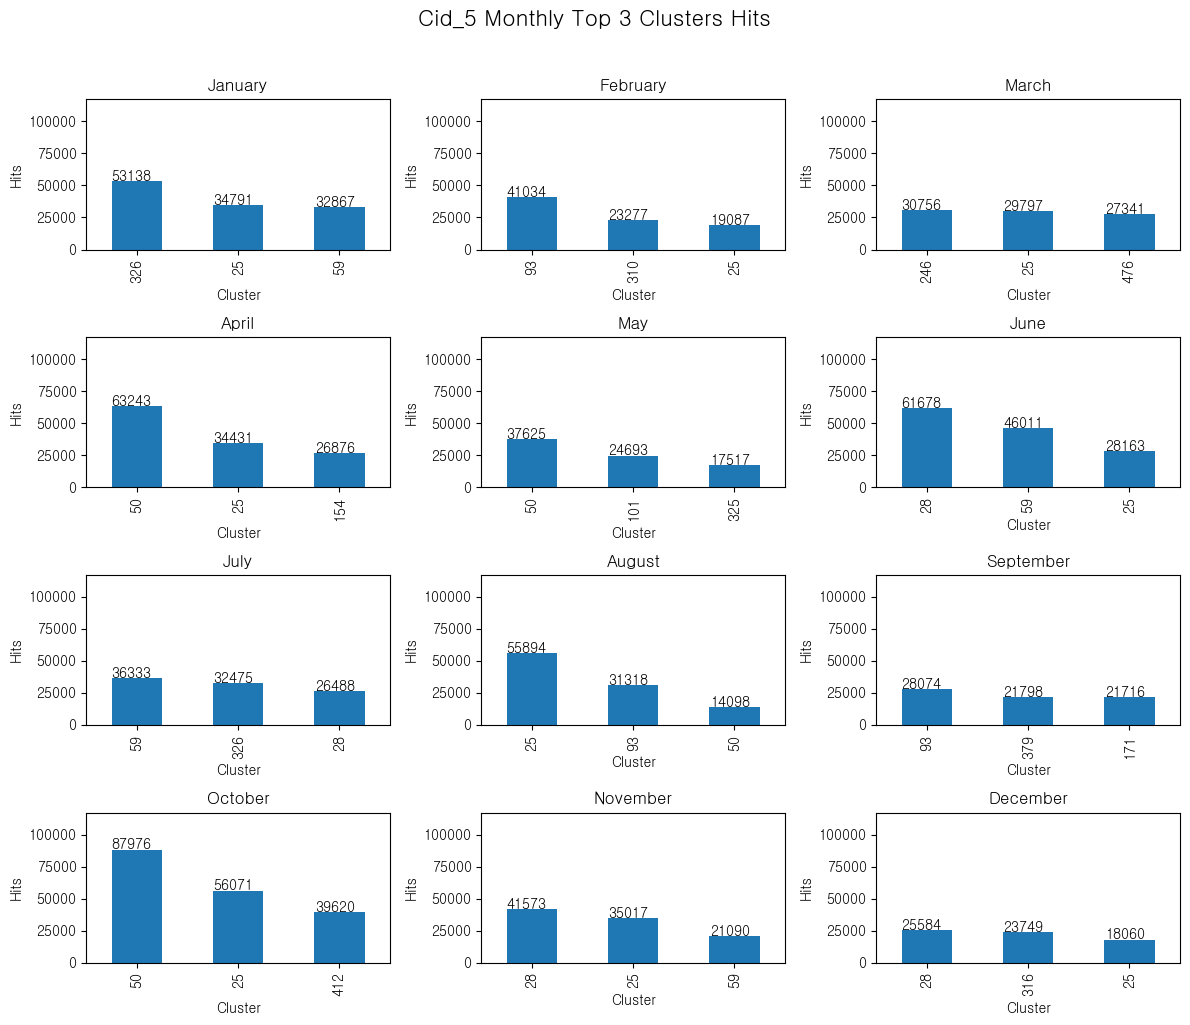

In [384]:
plot_monthly_top_clusters(df, cid=5, nor=3,num_clusters=3, figsize=(12, 10))


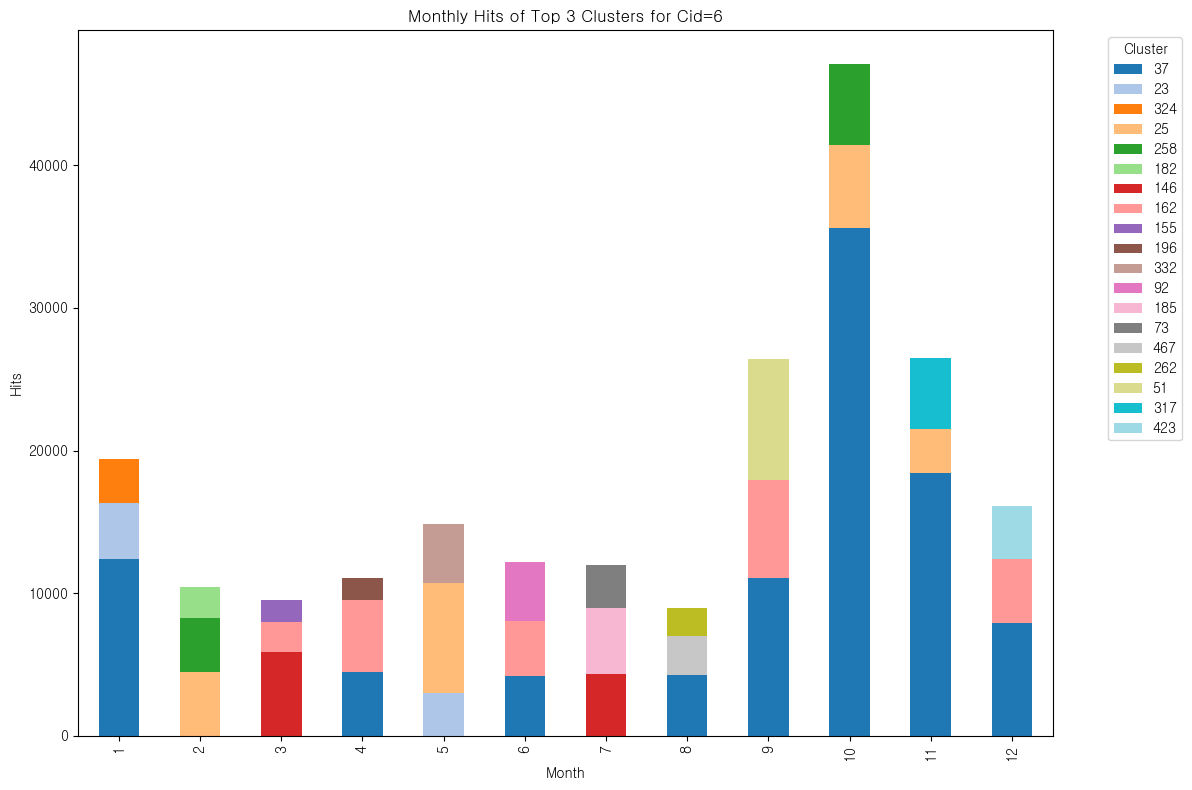

In [410]:
plot_monthly_hits(df_Cid_6, 6)


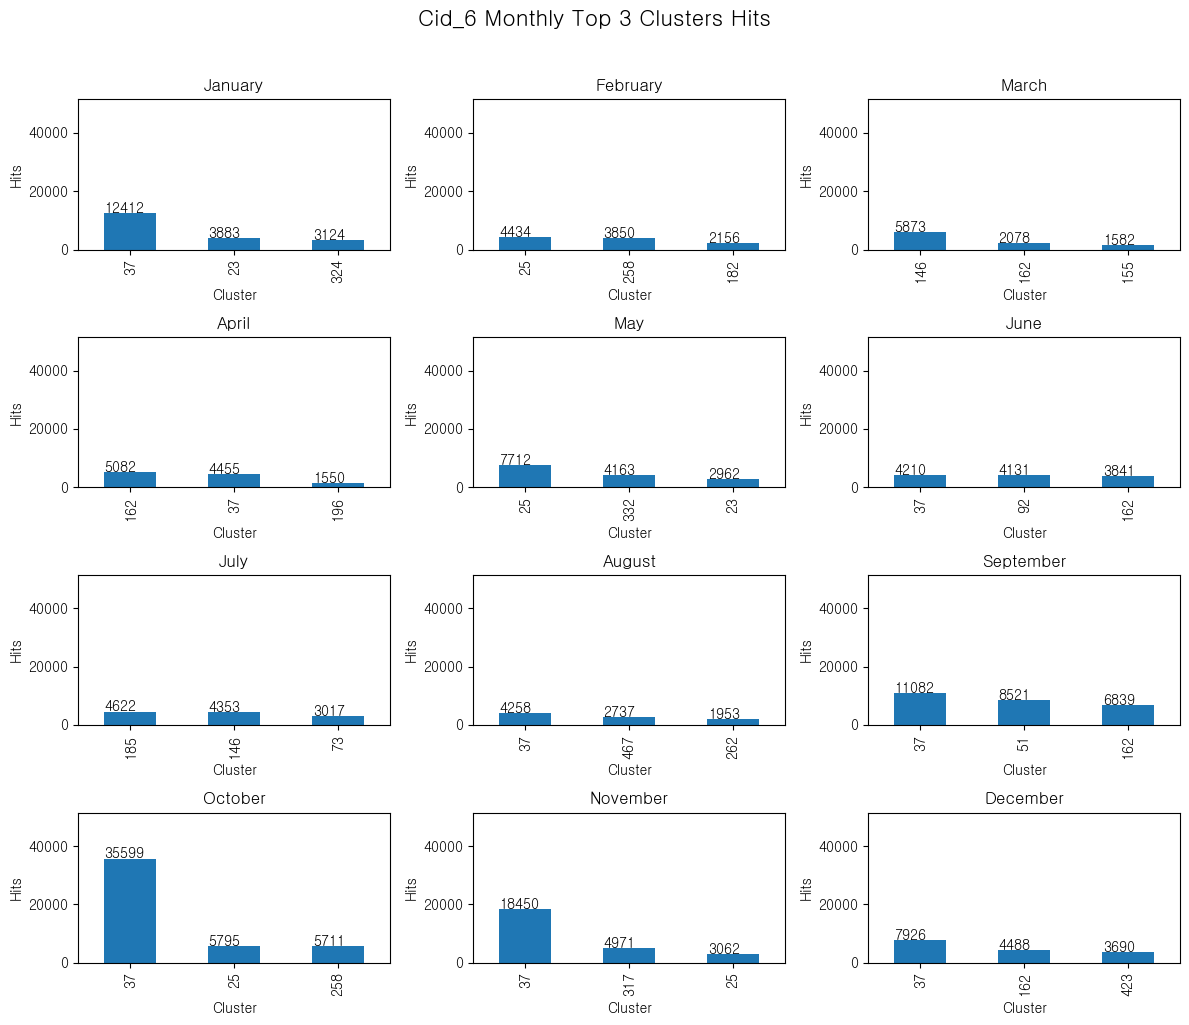

In [385]:
plot_monthly_top_clusters(df, cid=6, nor=2,num_clusters=3, figsize=(12, 10))


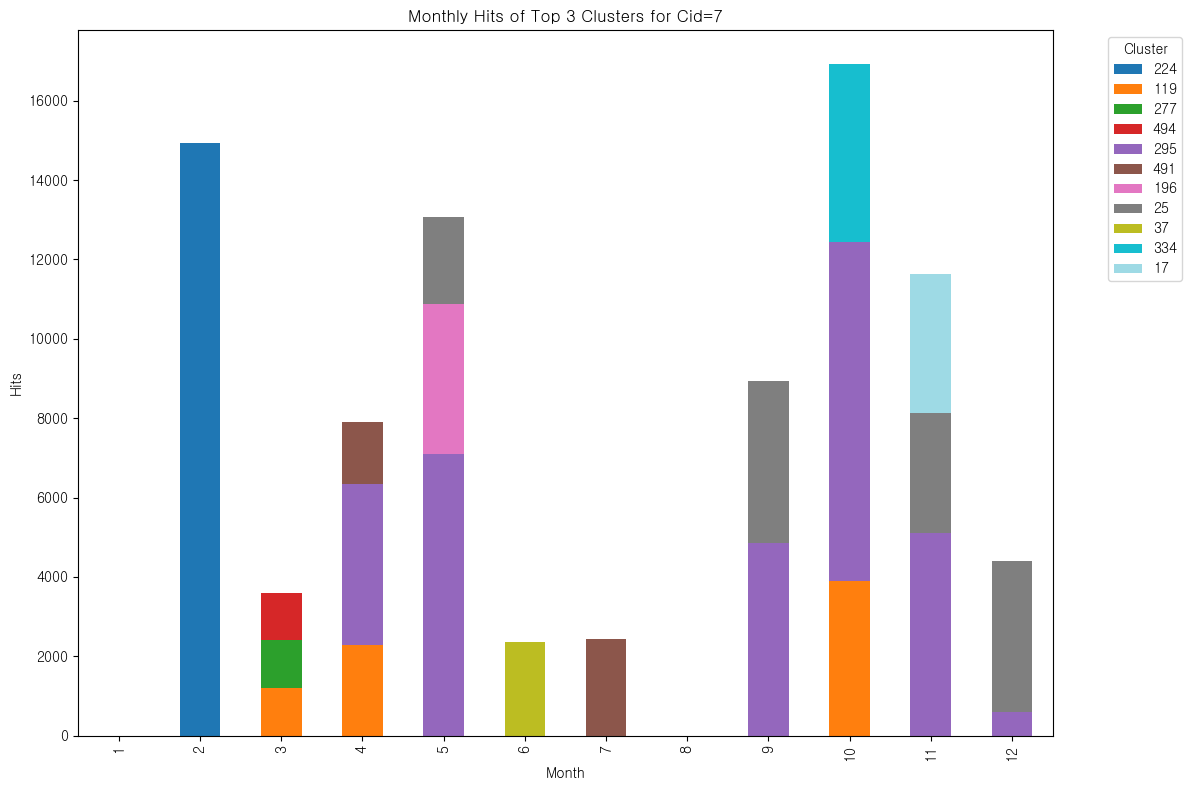

In [411]:
plot_monthly_hits(df_Cid_7, 7)


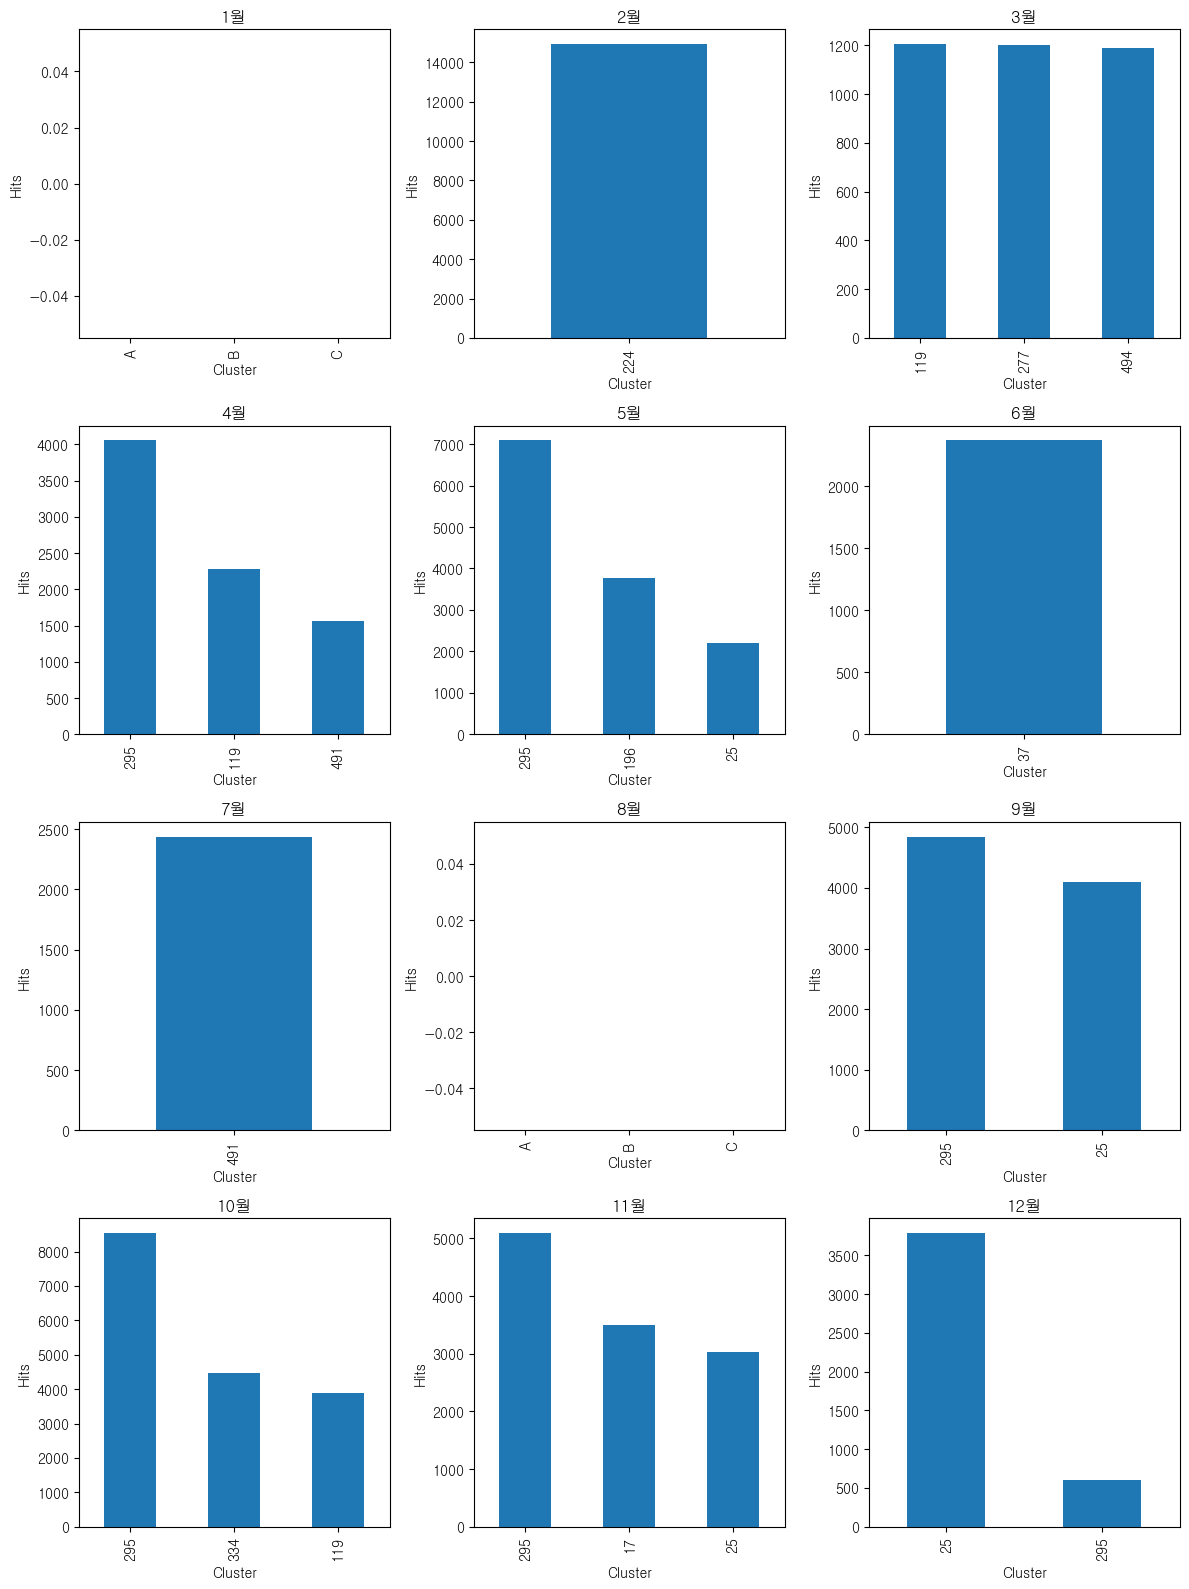

In [386]:
import matplotlib.pyplot as plt
import numpy as np

# 월별 데이터를 저장할 리스트
monthly_data = []

# 4x3 서브플롯 생성
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))

for month in range(1, 13):
    df_Cid_7_month = df_Cid_7[df_Cid_7['month'] == month]
    monthly_sum = df_Cid_7_month.groupby('cluster')['hits'].sum().nlargest(3)
    
    # 클러스터 데이터가 없는 경우, 빈 데이터 추가
    if monthly_sum.empty:
        monthly_sum = pd.Series([0, 0, 0], index=['A', 'B', 'C'])
    
    monthly_data.append((month, monthly_sum))

# 막대 그래프 생성
for i, (month, data) in enumerate(monthly_data):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    # 데이터가 없는 경우, 빈 데이터로 설정
    if data.empty:
        data = pd.Series([0, 0, 0], index=['A', 'B', 'C'])
    
    data.plot(kind='bar', ax=ax)
    ax.set_title(f"{month}월")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Hits")

plt.tight_layout()
plt.show()


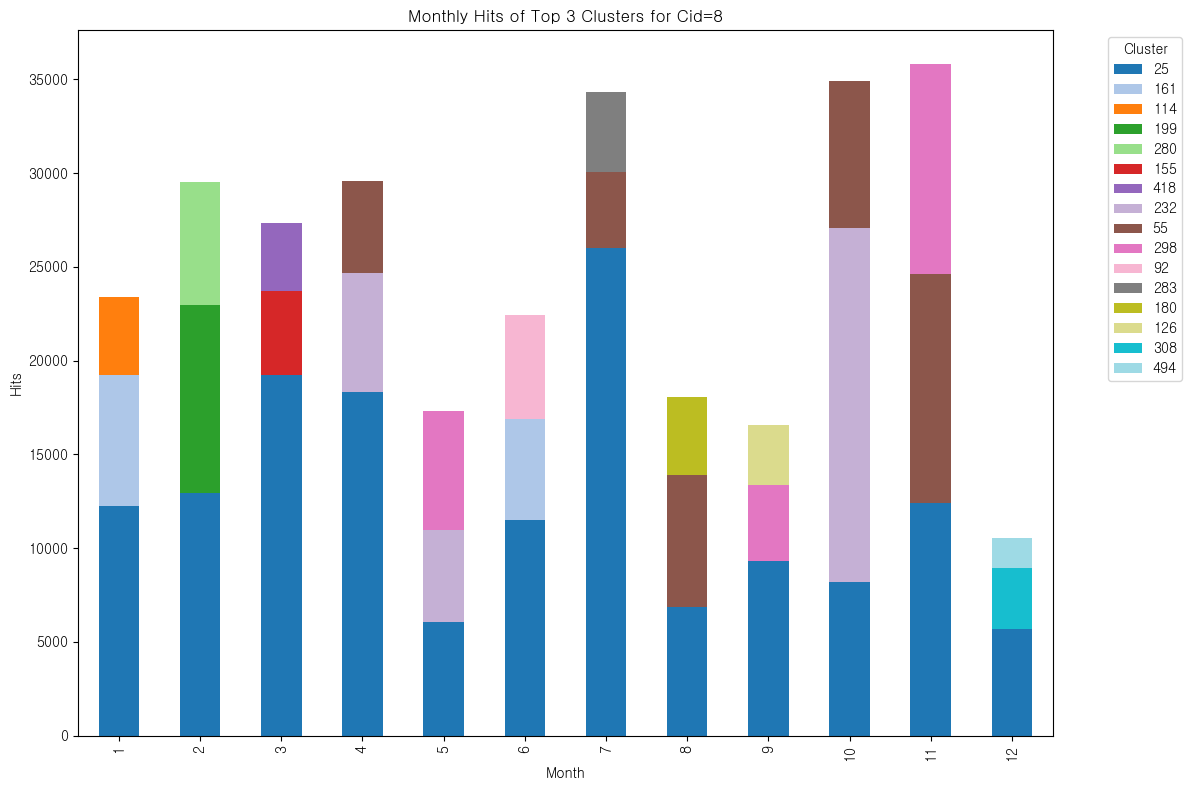

In [412]:
plot_monthly_hits(df_Cid_8, 8)

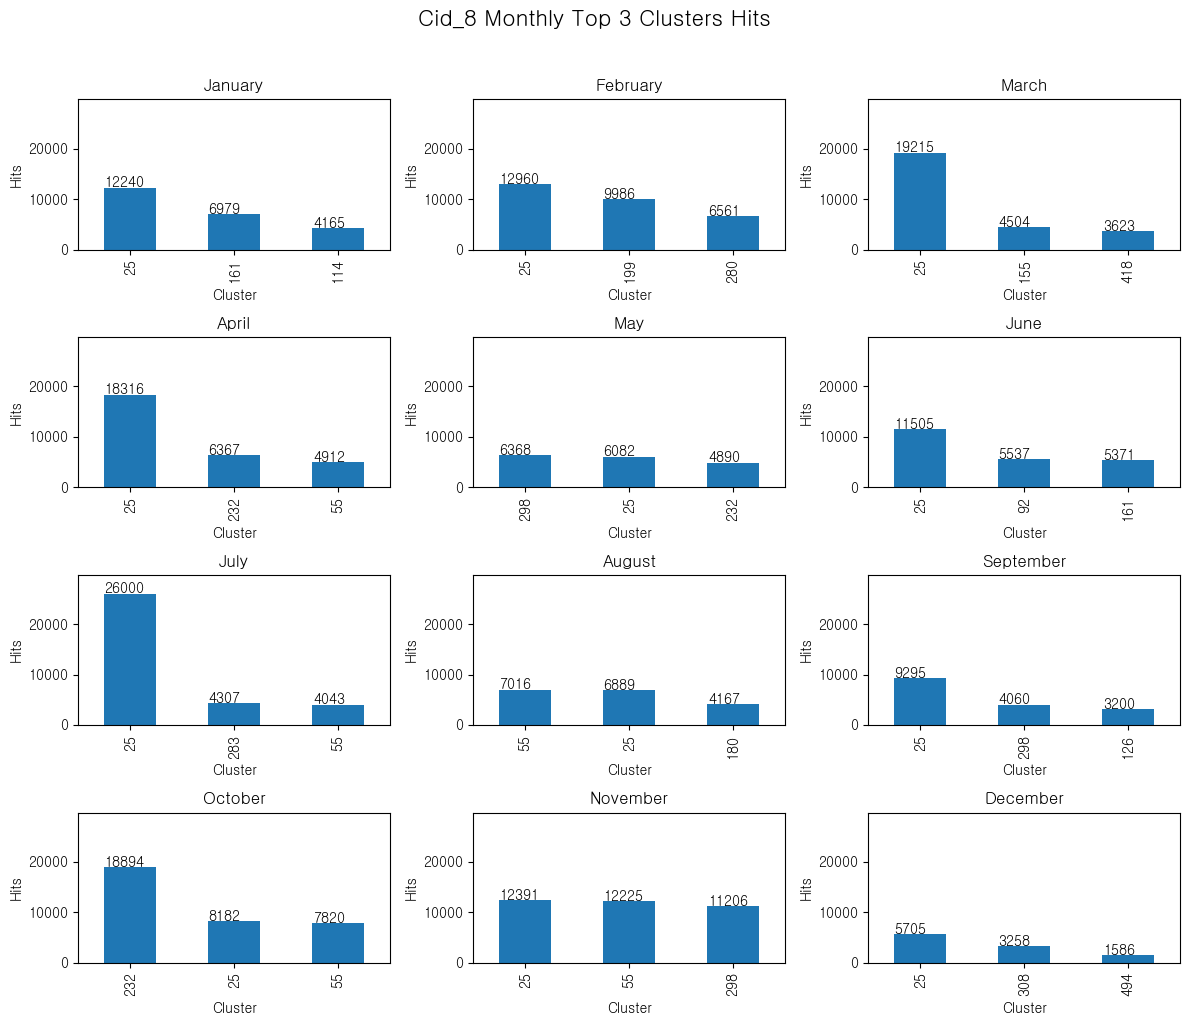

In [387]:
plot_monthly_top_clusters(df, cid=8, nor=5,num_clusters=3, figsize=(12, 10))

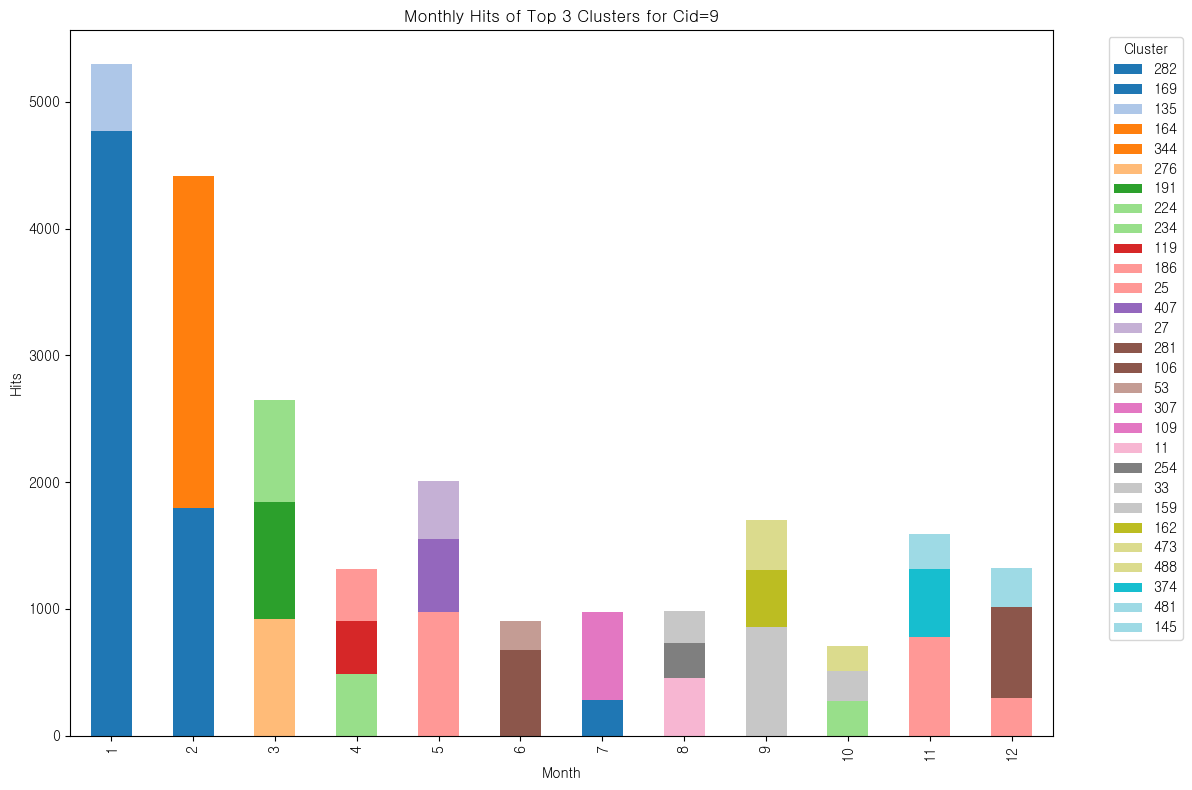

In [413]:
plot_monthly_hits(df_Cid_9, 9)



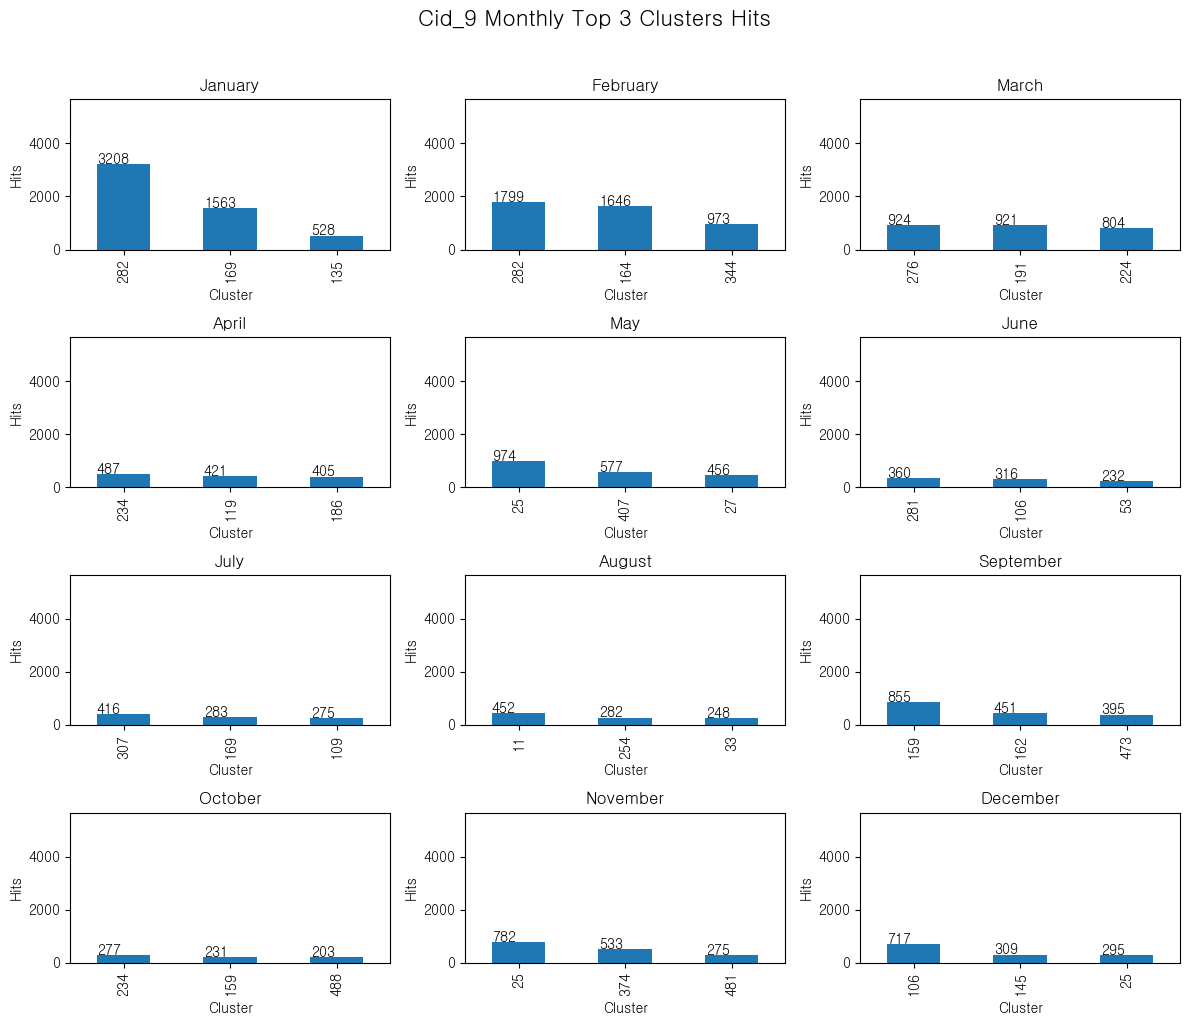

In [388]:
plot_monthly_top_clusters(df, cid=9, nor=1,num_clusters=3, figsize=(12, 10))


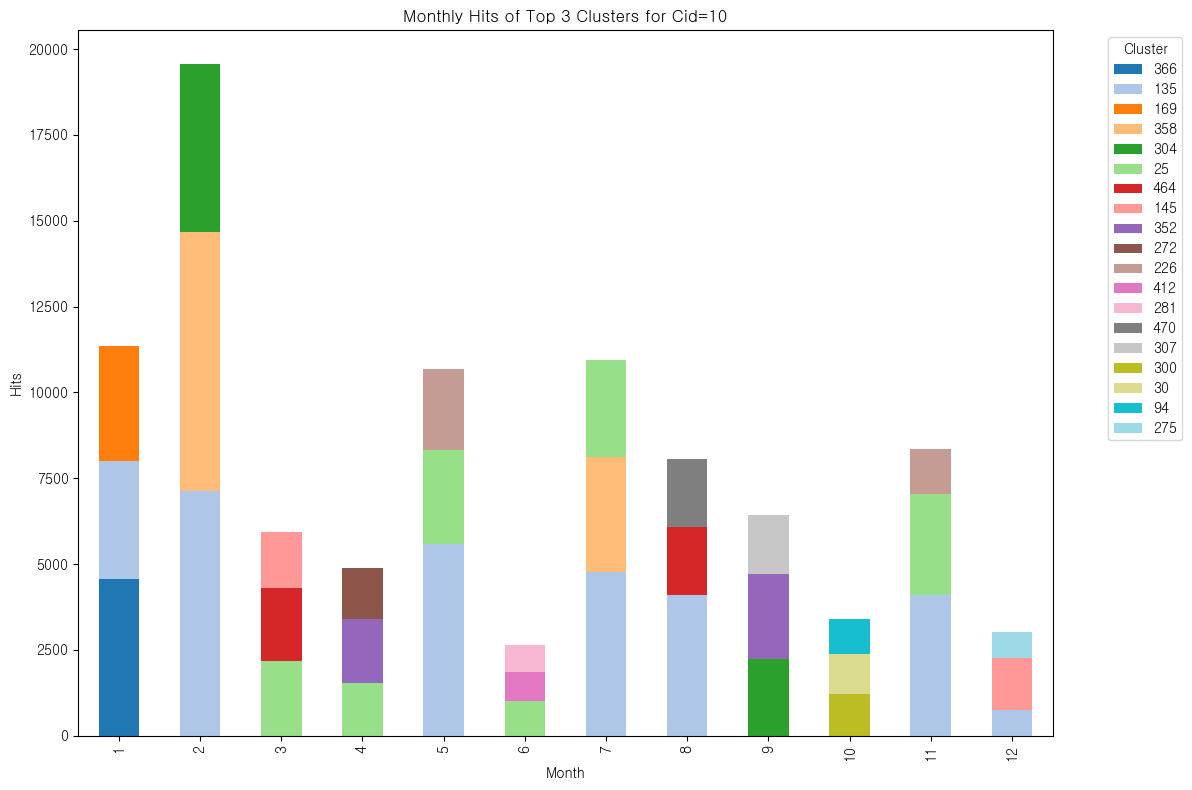

In [414]:
plot_monthly_hits(df_Cid_10, 10)


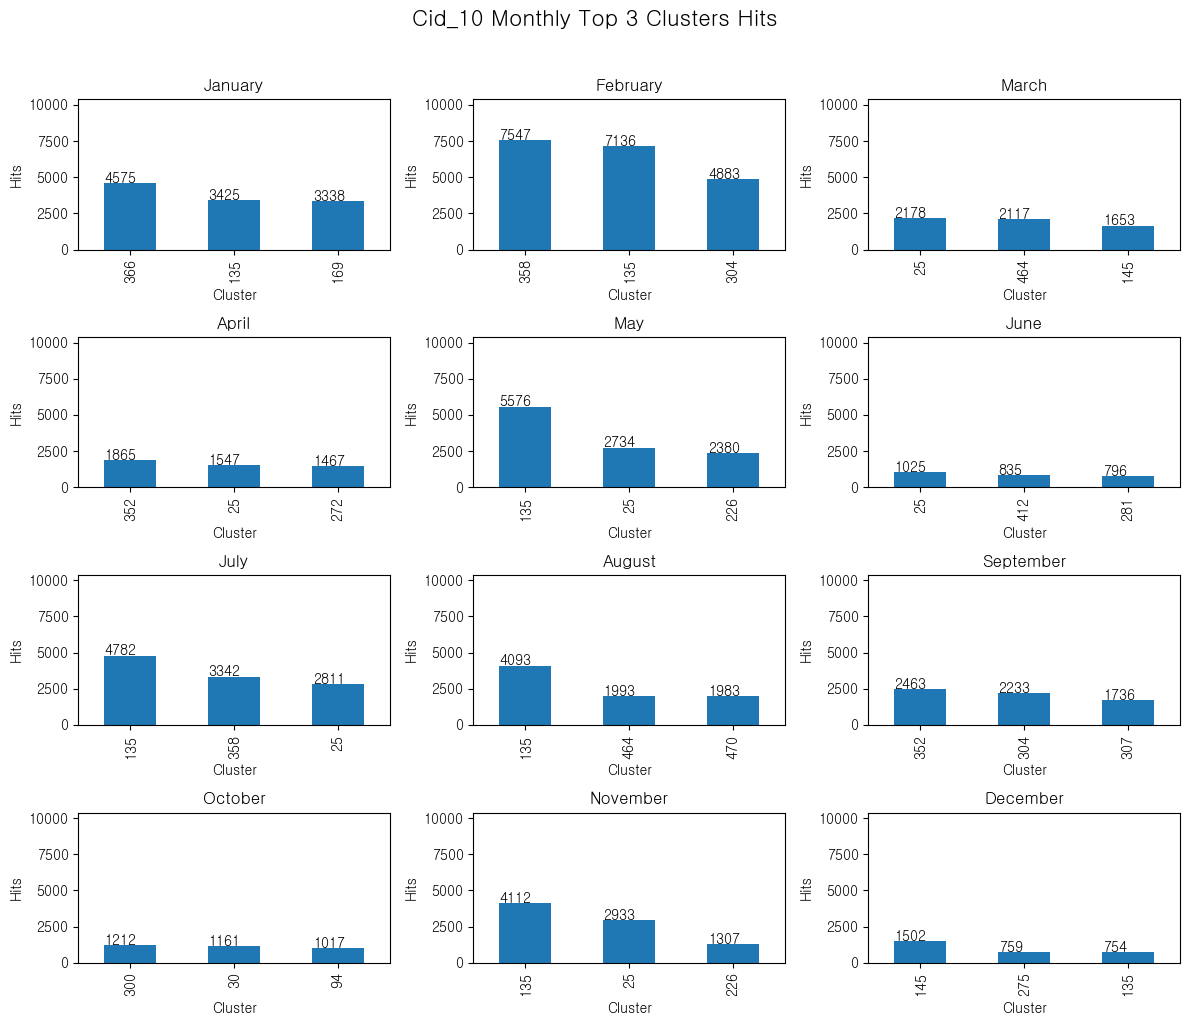

In [389]:
plot_monthly_top_clusters(df, cid=10, nor=3,num_clusters=3, figsize=(12, 10))
